In [27]:
par(family  = "Arial")
#install.packages("showtext")
library(showtext)
showtext_auto()
options(repr.plot.width=5, repr.plot.height=5)

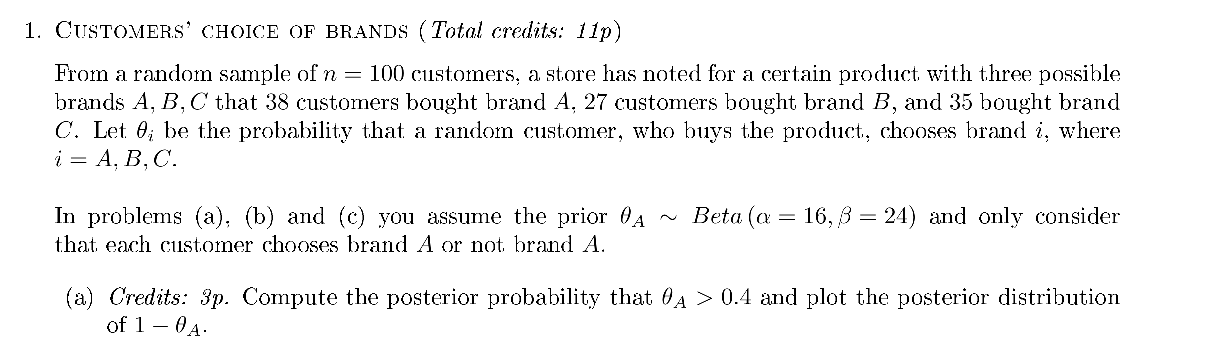

# Postrior with prior beta and bernoulli 

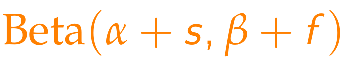

### Postrior = beta(16 + 38 , 24+62 ) = beta(54,86)

In [2]:
n = 100
A =38
B = 27
C = 35
beta = 24
alpha = 16

In [20]:
print('theta > 0.4')
pbeta(q= 0.4, shape1 =54,shape2 = 86,lower.tail = FALSE)

[1] "theta > 0.4"


[1] 0.3600383

In [15]:
# the posterior of 1- theta
post = rbeta(10000,shape1 = 54,shape2 = 86)

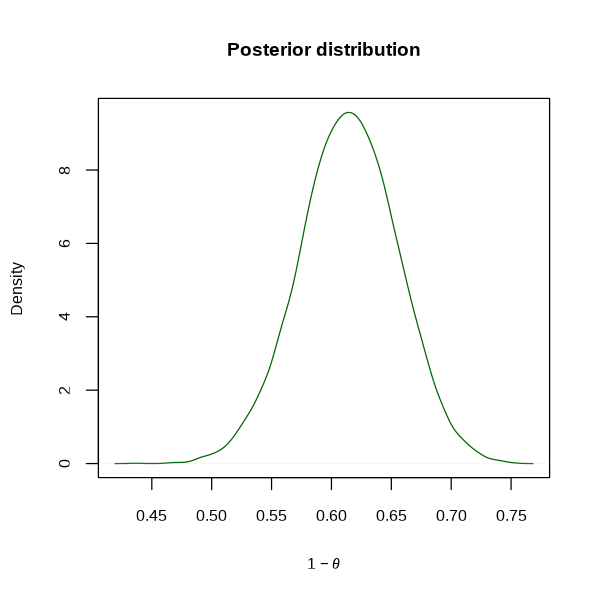

In [33]:
plot(density(1 - post),main="Posterior distribution" ,xlab = expression(1 - theta),col = 'darkgreen')

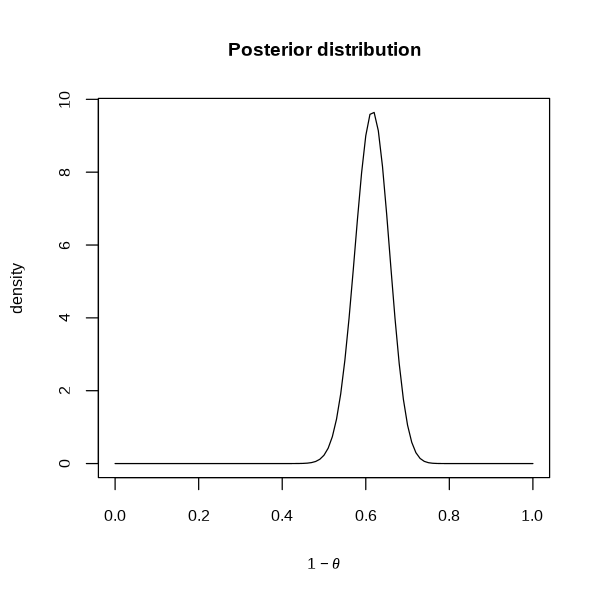

In [37]:
curve(dbeta(1-x,shape1 = 54,shape2 = 86),main='Posterior distribution',ylab = 'density',xlab = expression(1-theta))

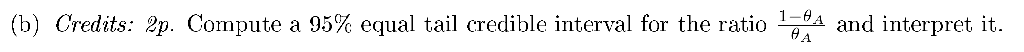

In [49]:
quantile((1-post)/post,c(0.025,0.975))

2.5%    97.5% 
1.133584 2.261348

The ratio is the odds of not choosing brand A, i.e. it describes how many more times likely it is to not
choose brand A compared to choosing brand A. The credible interval shows the values of the ratio with 95 %
probability.


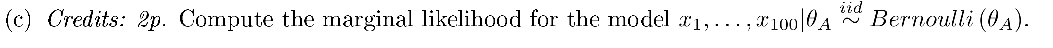

### The marginal likelihood:|

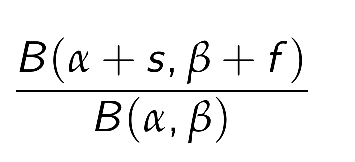

In [51]:
beta(54,86)/(beta(16,24))

[1] 7.556771e-30

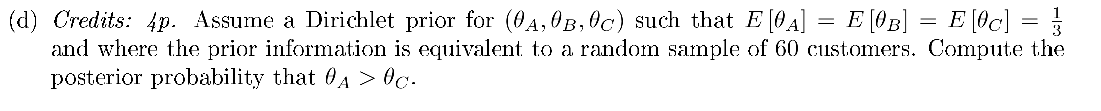

[1] 0.1429

[1] 0.0762

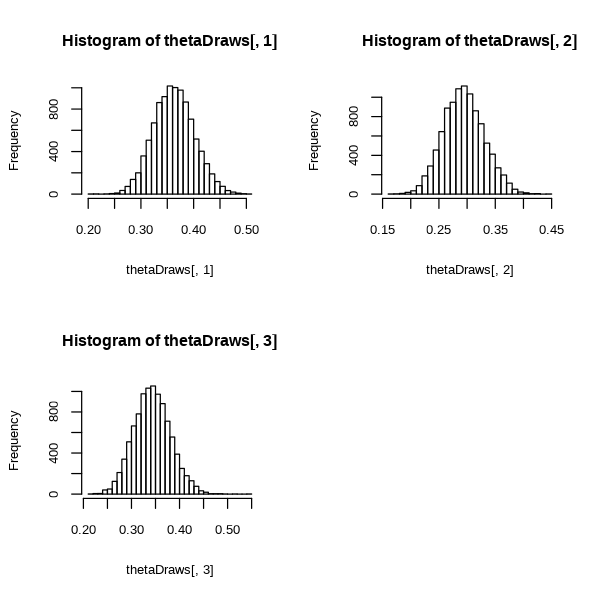

In [53]:
Dirichlet <- function(NDraws,y,alpha){
  K <- length(alpha)
  xDraws <- matrix(0,NDraws,K)
  thetaDraws <- matrix(0,NDraws,K) # Matrix where the posterior draws of theta are stored
  for (j in 1:K){
    xDraws[,j] <- rgamma(NDraws,shape=alpha[j]+y[j],rate=1)
  }
  for (ii in 1:NDraws){
    thetaDraws[ii,] <- xDraws[ii,]/sum(xDraws[ii,])
  }
  return(thetaDraws)
}

###########   Setting up data and prior  #################
y <- c(38,27,35) # Data of counts for each category
p <- y/sum(y)
alpha_const <- 1
alpha <- alpha_const*c(20,20,20) # Dirichlet prior hyperparameters
NDraws <- 10000 # Number of posterior draws

###########   Posterior sampling from Dirichlet  #################
thetaDraws <- Dirichlet(NDraws,y,alpha)

K <- length(y)
########### Summary statistics from the posterior sample #########
for (k in 1:K){
  mean(thetaDraws[,k])
  sqrt(var(thetaDraws[,k]))
}

sum(thetaDraws[,2]>thetaDraws[,1])/NDraws # p(theta2>theta3 | y)
# Posterior probability that Android has largest share, i.e. p(theta_2 > max(theta_1,theta_3,theta_4) | y)
Index_max <- matrix(0,NDraws,1)
for (ii in 1:NDraws){
Index_max[ii,1] <- which.max(thetaDraws[ii,])
}
mean(Index_max==2)

# Plot histograms of the posterior draws
plot.new() # Opens a new graphical window
par(mfrow = c(2,2)) # Splits the graphical window in four parts (2-by-2 structure)
hist(thetaDraws[,1],25) # Plots the histogram of theta[,1] in the upper left subgraph
hist(thetaDraws[,2],25)
hist(thetaDraws[,3],25)
#hist(thetaDraws[,4],25)


In [54]:
Index_max <- matrix(0,NDraws,1)
for (ii in 1:NDraws){
Index_max[ii,1] <- which.max(thetaDraws[ii,])
}
mean(Index_max==1)

[1] 0.5731

In [55]:
mean(thetaDraws[,1] > thetaDraws[,3])


[1] 0.6178